### Investigating the Stroop Effect

This is an exercise in setting up a hypothesis test, making inferences from a sample, and drawing valid conclusions based on the results. We investigate a classic phenomenon from experimental psychology called the "Stroop Effect".

#### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
(Taken from Nanodegrees Project Details)

#### The dataset

In [33]:
#Read the data into a dataframe using pandas
import pandas as pd

df = pd.read_csv("stroopdata.csv")
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


#### 1. What is our independent variable? What is our dependent variable?

Independent variable: The relationship between font color and word name 

Dependent variable: The recorded total time for each condition

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_{0}$:$\mu_{D}=$ 0

$H_{A}$:$\mu_{D}\neq$0

We are talking about a repeated measures design: Each of the 24 participants is assigned two kinds of treatments. As we also don't know population parameters, a dependent t-test for paired samples should be our statistical test of choice. 

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [37]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean for the "Congruent" condition is 14.05 with a standard deviation of 3.56; the mean for the "Incongruent" condition is 22.02 with a standard deviation of 4.80. 

The difference between the two means is -7.97.

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


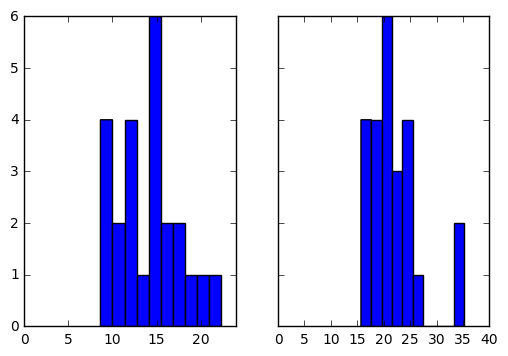

In [36]:
%pylab inline

import matplotlib.pyplot as plt

data1= df["Congruent"]
data2 = df["Incongruent"]


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(data1, bins=10)
ax1.set_xlim(xmin=0)
ax2.hist(data2, bins=10)
ax2.set_xlim(xmin=0)
plt.show()

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [29]:
from scipy import stats 

stats.ttest_rel(data1, data2)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

I don't see any reason why not to use the standard confidence level of 95%. Given this confidence level, a two-tailed t-test and df = 23 the t-critical value is 

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions